In [10]:
import numpy as np
from sklearn.feature_selection import r_regression
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def get_pearson(df: pd.DataFrame, experiment: str, book: str) -> np.ndarray:
    if experiment == 'pasting':
        y_name = 'iter_id'
    elif experiment == 'splitting':
        y_name = 'n_types'
    else:
        raise ValueError('Unknown experiment type', experiment)
    X = df[df['book'] == book][['D_order', 'D_structure']]
    y = df[df['book'] == book][y_name]
    assert len(y) == len(set(y.tolist()))
    return r_regression(X, y)

In [3]:
pasting_dir = '/home/pablo/ownCloud/WordOrderBibles/GitHub/output/KoplenigEtAl/WordPasting/HPC/'
files = os.listdir(pasting_dir)
bible_files = [file for file in files if file.startswith('entropies_') and file.endswith('.csv')]
print(len(bible_files))

1999


In [5]:
pearsons = []
warnings = []
empties = []
for file in bible_files:
    df = pd.read_csv(pasting_dir + file)
    if len(df) == 0:
        empties.append(file)
        continue
    books = df['book'].unique()
    for book in books:
        try:
            pearsons.append((get_pearson(df, 'pasting', book), file, book))
        except ValueError as e:
            warnings.append((file, e, book))

/home/pablo/anaconda3/envs/word_order_bibles/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/pablo/anaconda3/envs/word_order_bibles/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/pablo/anaconda3/envs/word_order_bibles/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/pablo/anaconda3/envs/word_order_bibles/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/home/pablo/anaconda3/envs/word_order_bibles/lib/python3.8/site-packages/sklearn/feature_selection/_univaria

In [6]:
print(len(pearsons), len(warnings), len(empties))

11354 0 38


In [9]:
pearsons[0]

(array([-0.83545897,  0.98715483]), 'entropies_ayo-x-bible.txt.csv', 'Matthew')

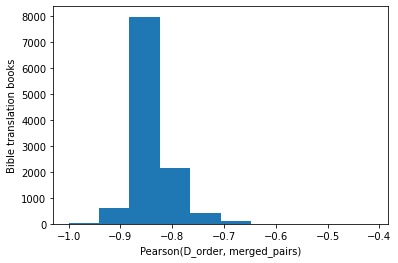

In [14]:
plt.hist([p[0][0] for p in pearsons])
plt.xlabel('Pearson(D_order, merged_pairs)')
plt.ylabel('Bible translation books')
plt.show()

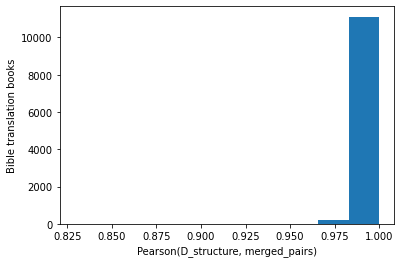

In [15]:
plt.hist([p[0][1] for p in pearsons])
plt.xlabel('Pearson(D_structure, merged_pairs)')
plt.ylabel('Bible translation books')
plt.show()